In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt


In [10]:
train_dir = r"C:\Users\racha\Downloads\mnist-jpg (1)\mnist-jpg\train"
test_dir  = r"C:\Users\racha\Downloads\mnist-jpg (1)\mnist-jpg\test"

In [11]:
# --- hyperparameters ---
IMG_SIZE = (28, 28)
BATCH = 128
EPOCHS = 5      
LR = 0.01
MOM = 0.9
NUM_CLASSES = 10

In [12]:
# --- load datasets from folders (labels inferred from folder names 0..9) ---
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, color_mode="grayscale",
    batch_size=BATCH, label_mode="int", shuffle=True, seed=123
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, color_mode="grayscale",
    batch_size=BATCH, label_mode="int", shuffle=False
)

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [13]:
# --- normalize (0-1) ---
normalizer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalizer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalizer(x), y))

In [14]:
# --- simple feedforward model ---
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [15]:
# --- compile with SGD ---
model.compile(optimizer=optimizers.SGD(learning_rate=LR, momentum=MOM),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# --- train ---
history = model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)


Epoch 1/5
469/469 [==============================] - 253s 531ms/step - loss: 0.5166 - accuracy: 0.8567 - val_loss: 0.2870 - val_accuracy: 0.9191
Epoch 2/5
469/469 [==============================] - 226s 473ms/step - loss: 0.2668 - accuracy: 0.9244 - val_loss: 0.2272 - val_accuracy: 0.9348
Epoch 3/5
469/469 [==============================] - 215s 452ms/step - loss: 0.2145 - accuracy: 0.9401 - val_loss: 0.1937 - val_accuracy: 0.9436
Epoch 4/5
469/469 [==============================] - 234s 492ms/step - loss: 0.1818 - accuracy: 0.9488 - val_loss: 0.1685 - val_accuracy: 0.9502
Epoch 5/5
469/469 [==============================] - 194s 407ms/step - loss: 0.1587 - accuracy: 0.9557 - val_loss: 0.1491 - val_accuracy: 0.9558


In [17]:
# --- evaluate ---
loss, acc = model.evaluate(test_ds)
print(f"Test loss: {loss:.4f}   Test accuracy: {acc:.4f}")

79/79 [==============================] - 19s 240ms/step - loss: 0.1491 - accuracy: 0.9558
Test loss: 0.1491   Test accuracy: 0.9558


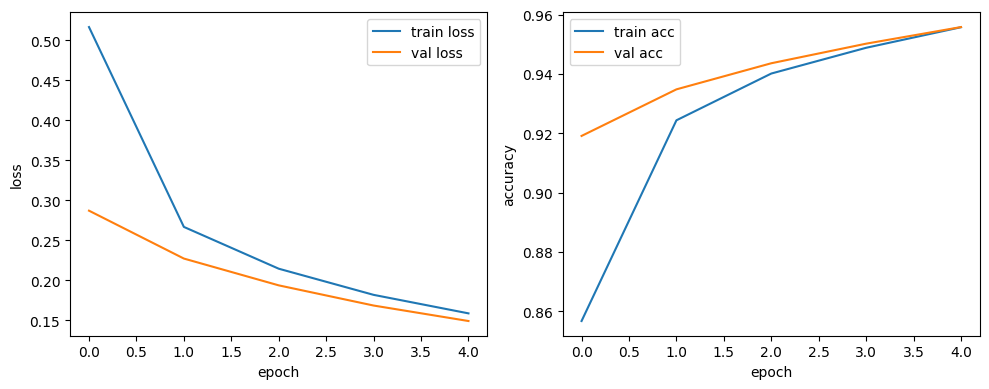

In [18]:
# --- simple plots ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history.get('val_loss', []), label='val loss')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history.get('val_accuracy', []), label='val acc')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend()

plt.tight_layout()
plt.show()